In [1]:
import pandas as pd
df = pd.read_csv('tvmarketing.csv')
print(df.head(5))

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [6]:
print(df.dtypes)

TV       float64
Sales    float64
dtype: object


In [7]:
print(df.shape)

(200, 2)


In [11]:
print(df.describe())

               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


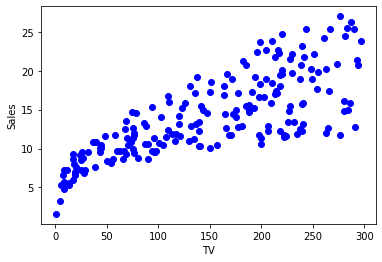

In [15]:
import matplotlib.pyplot as plt
x = df['TV']
y = df['Sales']
    
plt.scatter(x, y, color='blue')
plt.xlabel("TV")
plt.ylabel("Sales")

plt.show()

In [20]:
x = df[['TV']]
y = df['Sales']
print(x.head())
print(y.head())

      TV
0  230.1
1   44.5
2   17.2
3  151.5
4  180.8
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)
print(" x train" ,x_train.shape)
print(" x test",x_test)
print(" y train",y_train)
print(" y test", y_test)


 x train         TV
31   112.9
188  286.0
120  141.3
135   48.3
108   13.1
..     ...
62   239.3
0    230.1
97   184.9
197  177.0
130    0.7

[140 rows x 1 columns]
 x test         TV
121   18.8
124  229.5
123  123.1
133  219.8
104  238.2
111  241.7
171  164.5
34    95.7
73   129.4
21   237.4
175  276.9
12    23.8
67   139.3
60    53.5
64   131.1
187  191.1
116  139.2
112  175.7
109  255.4
92   217.7
86    76.3
3    151.5
39   228.0
132    8.4
20   218.4
71   109.8
139  184.9
38    43.1
85   193.2
161   85.7
163  163.5
167  206.8
106   25.0
58   210.8
190   39.5
126    7.8
59   210.7
35   290.7
170   50.0
113  209.6
174  222.4
128  220.3
69   216.8
91    28.6
149   44.7
115   75.1
100  222.4
11   214.7
165  234.5
160  172.5
99   135.2
72    26.8
166   17.9
144   96.2
29    70.6
90   134.3
37    74.7
88    88.3
195   38.2
125   87.2
 y train 31     11.9
188    15.9
120    15.5
135    11.6
108     5.3
       ... 
62     15.7
0      22.1
97     15.5
197    12.8
130     1.6
Name: Sales, Le

In [32]:
#shapes
print(" x train" ,x_train.shape)
print(" x test",x_test.shape)
print(" y train",y_train.shape)
print(" y test", y_test.shape)

 x train (140, 1)
 x test (60, 1)
 y train (140,)
 y test (60,)


In [39]:
    import numpy as np

    xtrain = x_train.values.flatten()
    ytrain = y_train.values.flatten()


    x_mean = np.mean(xtrain)
    y_mean = np.mean(ytrain)

    b1 = np.sum((xtrain - x_mean) * (ytrain - y_mean)) / np.sum((xtrain - x_mean)**2)

    b0 = y_mean - (b1 * x_mean)

    print("slop =",b1)
    print("intercept = ",b0)








slop = 0.047480917594476583
intercept =  6.8603513469691055


In [40]:
X_test_np = x_test.values.flatten()
y_pred_manual = b0 + b1 * X_test_np

print("\nManual Predictions on Testing Set:")
print(y_pred_manual[:5]) 


Manual Predictions on Testing Set:
[ 7.7529926  17.75722193 12.7052523  17.29665703 18.17030592]


In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
inter = lr.intercept_
coeff = lr.coef_

In [43]:
print(inter , coeff)

6.860351346969102 [0.04748092]


In [44]:
y_pred = lr.predict(x_test)
print("\nscikit-learn Predictions on Testing Set:")
print(y_pred[:5])


scikit-learn Predictions on Testing Set:
[ 7.7529926  17.75722193 12.7052523  17.29665703 18.17030592]


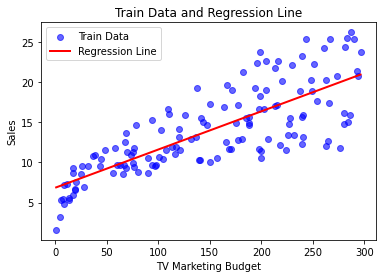

In [50]:

plt.scatter(x_train, y_train, color='blue', alpha=0.6, label="Train Data")
# Create points for the regression line
x_line = np.linspace(x_train['TV'].min(), x_train['TV'].max(), 100)
y_line = lr.intercept_ + lr.coef_[0] * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label="Regression Line")
plt.title("Train Data and Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()

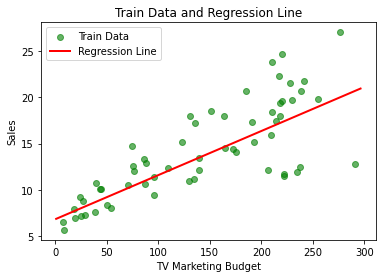

In [53]:

plt.scatter(x_test, y_test, color='green', alpha=0.6, label="Train Data")
plt.plot(x_line, y_line, color='red', linewidth=2, label="Regression Line")
plt.title("Train Data and Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [2]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation (scikit-learn):")
print("Mean Squared Error (MSE):", mse)
print("R Squared:", r2)


NameError: name 'y_test' is not defined

In [2]:
df.dtypes

TV       float64
Sales    float64
dtype: object

In [4]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [5]:
df.head(5)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [7]:
df.shape

(200, 2)

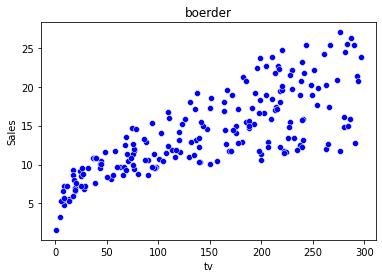

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=df['TV'],y=df['Sales'],color="blue")
plt.xlabel("tv")
plt.ylabel("Sales")
plt.title("boerder")
plt.show()

In [15]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [60]:
x=df[['TV']]
y=df['Sales']

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

In [63]:
x_train.shape

(140, 1)

In [64]:
x_test.shape

(60, 1)

In [59]:
x_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: Sales, Length: 140, dtype: float64

In [25]:
x_test

95     163.3
15     195.4
30     292.9
158     11.7
128    220.3
115     75.1
69     216.8
170     50.0
174    222.4
45     175.1
66      31.5
182     56.2
165    234.5
78       5.4
186    139.5
177    170.2
56       7.3
152    197.6
82      75.3
68     237.4
124    229.5
16      67.8
148     38.0
93     250.9
65      69.0
60      53.5
84     213.5
67     139.3
125     87.2
132      8.4
9      199.8
18      69.2
55     198.9
75      16.9
150    280.7
104    238.2
135     48.3
137    273.7
164    117.2
76      27.5
79     116.0
197    177.0
38      43.1
24      62.3
122    224.0
195     38.2
29      70.6
19     147.3
143    104.6
86      76.3
114     78.2
173    168.4
5        8.7
126      7.8
117     76.4
73     129.4
140     73.4
98     289.7
172     19.6
96     197.6
Name: TV, dtype: float64

In [26]:
x_test.shape

(60,)

In [39]:
import numpy as np

xtrain = x_train.values.flatten()
ytrain = y_train.values.flatten()

xmean = np.mean(xtrain)
ymean = np.mean(ytrain)

#y = b0+b1x

b1 = np.sum((xtrain - xmean) * (ytrain - ymean)) / np.sum((xtrain - xmean)**2)

b0 = ymean - b1 * xmean

print(b1,b0)


0.04640780212815278 7.2394598307511355


In [46]:
#xtest = x_test.values.flatten()

pridected_values = b0 + b1*x_test

print(pridected_values)

95     14.817854
15     16.307544
30     20.832305
158     7.782431
128    17.463099
115    10.724686
69     17.300671
170     9.559850
174    17.560555
45     15.365466
66      8.701306
182     9.847578
165    18.122089
78      7.490062
186    13.713348
177    15.138068
56      7.578237
152    16.409642
82     10.733967
68     18.256672
124    17.890050
16     10.385909
148     9.002956
93     18.883177
65     10.441598
60      9.722277
84     17.147526
67     13.704067
125    11.286220
132     7.629285
9      16.511739
18     10.450880
55     16.469972
75      8.023752
150    20.266130
104    18.293798
135     9.480957
137    19.941275
164    12.678454
76      8.515674
79     12.622765
197    15.453641
38      9.239636
24     10.130666
122    17.634808
195     9.012238
29     10.515851
19     14.075329
143    12.093716
86     10.780375
114    10.868550
173    15.054534
5       7.643208
126     7.601441
117    10.785016
73     13.244629
140    10.645793
98     20.683800
172     8.1490

In [41]:
import numpy as np

#xtrain = x_train.values.flatten()
#ytrain = y_train.values.flatten()

xmean = x_train.mean()
ymean = y_train.mean()

#y = b0+b1x

b1 = np.sum((x_train - xmean) * (y_train - ymean)) / np.sum((x_train - xmean)**2)

b0 = ymean - b1 * xmean

print(b1,b0)

0.04640780212815278 7.2394598307511355


In [44]:
x_train.info

<bound method Series.info of 169    284.3
97     184.9
31     112.9
12      23.8
35     290.7
       ...  
106     25.0
14     204.1
92     217.7
179    165.6
102    280.2
Name: TV, Length: 140, dtype: float64>

In [45]:
type(x_train)

pandas.core.series.Series

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [74]:
print(lr.intercept_)
print(lr.coef_)

7.239459830751138
[0.0464078]


In [76]:
pridt = lr.predict(x_test)

pridt[:5]

array([14.81785392, 16.30754437, 20.83230507,  7.78243112, 17.46309864])

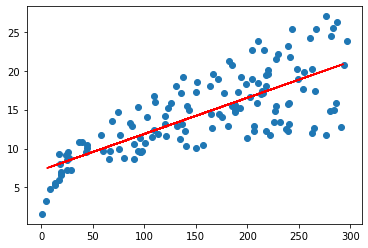

In [83]:
plt.scatter(x=x_train,y=y_train)
plt.plot(x_test,lr.predict(x_test),color="red")
plt.show()

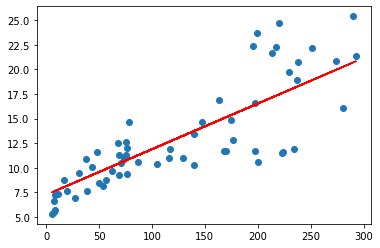

In [84]:
plt.scatter(x=x_test,y=y_test)
plt.plot(x_test,lr.predict(x_test),color="red")
plt.show()